In [5]:
%load_ext autoreload
%autoreload 2

import os

subjects = list(range(1, 31, 1))

root = "shuffled_flow/analysis"
os.makedirs(root, exist_ok = True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy
import pandas
import IPython.display
import matplotlib.pyplot as plt

import SDA.analytics
import SDA.clustquality

### Results

In [7]:
class Results:
    def __init__(self, features_type: str):
        self.silhouettes: list = [ ]
        self.shuffled: list = [ ]

        for subject_num in subjects:
            subj = f"phase2/Subj{subject_num}"

            best_result = pandas.read_csv(f"{subj}/exp_reduced_flow/results/{features_type}/best_result.csv").iloc[0].to_dict()
            self.silhouettes.append(best_result["Avg-Silh"])
            
            best_result = pandas.read_csv(f"{subj}/exp_shuffled/results/{features_type}/best_result.csv").iloc[0].to_dict()
            self.shuffled.append(best_result["Avg-Silh"])

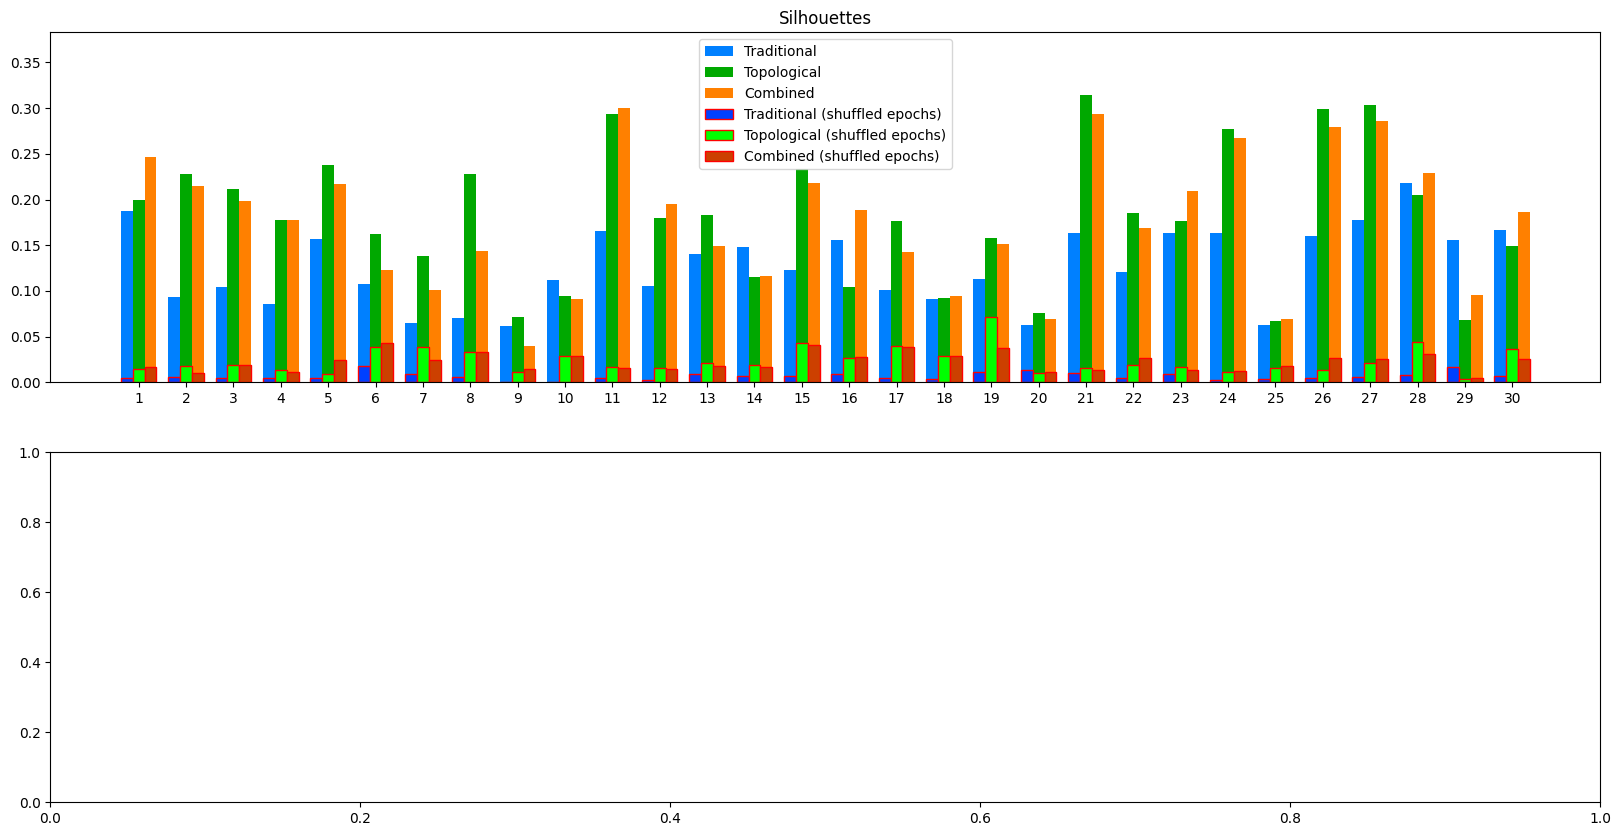

In [ ]:
traditional = Results("traditional")
topological = Results("best_topological")
combined = Results("combined")

plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(2, 1, figsize = (20, 10))
WIDTH = 0.25
ROTATION = 45

def draw(ax, x: list, traditional: Results, topological: Results, combined: Results, title: str):
    mini = numpy.min([ *traditional.silhouettes, *topological.silhouettes, *combined.silhouettes ])
    maxi = numpy.max([ *traditional.silhouettes, *topological.silhouettes, *combined.silhouettes ])
    ax.set_ylim(max(mini - (maxi - mini) / 2, 0), maxi + (maxi - mini) / 4)

    x = numpy.array(subjects)

    ax.bar(x, traditional.silhouettes, width = WIDTH, color = (0, 0.5, 1), label = 'Traditional')
    ax.bar(x + WIDTH, topological.silhouettes, width = WIDTH, color = (0, 0.66, 0), label = 'Topological')
    ax.bar(x + 2 * WIDTH, combined.silhouettes, width = WIDTH, color = (1, 0.5, 0), label = 'Combined')
    
    ax.bar(x, traditional.shuffled, width = WIDTH, edgecolor = 'red', color = (0, 0.25, 1), label = 'Traditional (shuffled epochs)')
    ax.bar(x + WIDTH, topological.shuffled, width = WIDTH, edgecolor = 'red', color = (0, 1, 0), label = 'Topological (shuffled epochs)')
    ax.bar(x + 2 * WIDTH, combined.shuffled, width = WIDTH, edgecolor = 'red', color = (0.8, 0.25, 0), label = 'Combined (shuffled epochs)')
    
    ax.set_xticks(x + WIDTH, x)
    ax.set_title(title)
    ax.legend()

draw(axes.flat[0], subjects, traditional, topological, combined, "Silhouettes")

fig.savefig(f"{root}/results.svg")
fig.savefig(f"{root}/results.png")